In [7]:
#✅ Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


In [8]:
#Upload
from google.colab import files
uploaded = files.upload()


Saving data.csv to data (1).csv


In [9]:
#✅ Step 2: Load Dataset
df = pd.read_csv("data.csv")  # Upload and rename your dataset as data.csv
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
#✅ Step 3: Preprocess Data
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)  # remove unnecessary columns

# Encode target column: M → 1 (Malignant), B → 0 (Benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


In [11]:
#✅ Step 4: Train/Test Split + Feature Scaling
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [12]:
#✅ Step 5: Fit Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

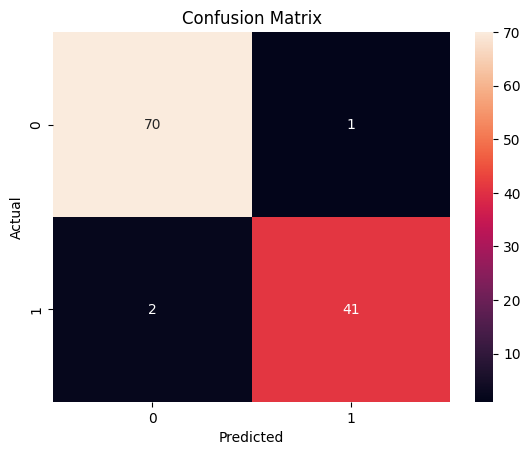

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



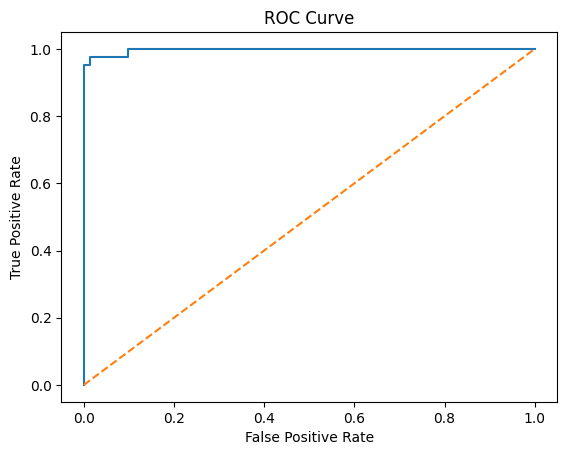

ROC-AUC Score: 0.99737962659679


In [13]:
#✅ Step 6: Predict & Evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], '--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# ROC-AUC Score
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


In [14]:
#✅ Step 7: Sigmoid Function Explanation
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

print("Sigmoid(0):", sigmoid(0))  # Output: 0.5
print("Sigmoid(2):", sigmoid(2))
print("Sigmoid(-2):", sigmoid(-2))


Sigmoid(0): 0.5
Sigmoid(2): 0.8807970779778823
Sigmoid(-2): 0.11920292202211755
